## Feature Engineering

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

In [4]:
df = pd.read_csv(r"C:\Users\owner\clean_data_after_eda.csv")
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

In [3]:
pd.set_option('display.max.columns', 56)

### Difference between off-peak prices in December and preceding January

In [5]:
price_df = pd.read_csv(r"C:\Users\owner\FORAGE_BCG\price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [7]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

---

## Average price changes across periods

We can now enhance the feature by calculating the average price changes across individual periods, instead of the entire year.

In [10]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
mean_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [12]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [16]:
pd.set_option('display.max.columns', 100) 

In [17]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

This feature may be useful because it adds more granularity to the existing feature that shows the difference between off-peak prices in December and preceding January. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

---

## Max price changes across periods and months

The feature can be further enhanced by looking at the maximum change in prices across periods and months.

In [18]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [19]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [20]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [21]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

Since we are trying to predict churn for this use case, calculating the maximum price change between months and time periods might be a good feature to create thinking from the perspective of a PowerCo client. 

---

## Further feature engineering

This section covers deeper feature engineering, as well as different ways to transform the data to account for some of its statistical properties, such as skewness.

In [26]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

Companies who have only been a client for 4 or less years are much more likely to churn compared to companies that have been a client for longer.
This is an interesting feature to keep for modelling because how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

In [31]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [32]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [33]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000           44.555962   
3                0.000000                0.000000           44.551475   
4               24.412893               16.275263           40.812330   

   mean_year_price_p2  mean_year_price_p3  mean_6m_price_p1_var  \
0           22.452760           14.967871              0.123598   
1            0.007124            0.000

### Transforming Boolean data & Categorical data

#### has_gas

We simply transform this column from being categorical to being a binary column

In [34]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. This is a useful feature.

#### channel_sales

In [35]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 10000+ rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all

For this reason, we will drop these 3 dummy variables.

In [36]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.124787                0.100749                0.066530   
1                0.149609                0.007124                0.000000   
2                0.170512                0.088421                0.000000   
3                0.151210                0.000000                0.000000   
4                0.124174                0.103638                0.072865   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.942265               22.352010               14.901340   
1               44.311375                0.000000                0.000000   
2               44.385450                0.000000                0.000000   
3               44.400265                0.000000                0.000000   
4               40.688156               24.412893               16.275263   

   mean_year_price_p1  mean_year_price_p2  mean_year_price_p3  \
0           41.067053           22.452760           14.967871   
1           44.460984            0.007124            0.000000   
2           44.555962            0.088421            0.000000   
3           44.551475            0.000000            0.000000   
4           40.812330           24.516531           16.348129   

   mean_6m_price_p1_var  mean_6m_price_p2_var  mean_6m_price_p3_var  \
0              0.123598              0.098104              

#### origin_up

In [37]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to `channel_sales` the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [38]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  mean_year_price_p1_var  mean_year_price_p2_var  \
0                3   43.648                0.124787                0.100749   
1                6   13.800                0.149609                0.007124   
2                6   13.856                0.170512                0.088421   
3                6   13.200                0.151210                0.000000   
4                6   19.800                0.124174                0.103638   

   mean_year_price_p3_var  mean_year_price_p1_fix  mean_year_price_p2_fix  \
0                0.066530               40.942265               22.352010   
1                0.000000               44.311375                0.000000   
2                0.000000               44.385450                0.000000   
3                0.000000               44.400265                0.000000   
4                0.072865               40.688156               24.412893   

   mean_year_price_p3_fix  mean_year_price_p1  mean_year_price_p2  \
0               14.901340           41.067053           22.452760   
1                0.000000           44.460984            0.007124   
2                0.000000           44.555962            0.088421   
3                0.000000           44.551475            0.000000   
4               16.275263           40.812330           24.516531   

   mean_year_price_p3  mean_6m_price_p1_var  mean_6m_price_p2_var  \
0           14.967871              0.123598              0.098104   
1            0.000000              0.147851              0.014247   
2            0.000000              0.168569              0.088535   
3            0.000000              0.149330              0.000000   
4           16.348129              0.121266              0.102368   

   mean_6m_price_p3_var  mean_6m_price_p1_fix  mean_6m_price_p2_fix  \

### Transforming numerical data

Logarithm transformation will be used to treat skewness because it can improve the speed at which predictive models are able to converge to its best solution.

In [39]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Some values in the dataset are 0 and we cannot apply log to a value of 0, so we will add a constant of 1 to all the values

In [40]:
# Apply log transformation
df["cons_12m"] = np.log(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log(df["imp_cons"] + 1)

In [41]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       9.725993      1.793663         5.214898           6.820631   
std        2.036741      3.953143         4.073886           1.574076   
min        0.000000      0.000000         0.000000           0.000000   
25%        8.643826      0.000000         0.000000           6.206536   
50%        9.555135      0.000000         6.677083           7.015362   
75%       10.615579      0.000000         8.126814           7.784586   
max       15.641205     15.239725        13.555708          11.325437   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             4.109499                  0.966450                 3.493559   
std              3.649533                  5.108355                 1.315902   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 2.843746   
50%              5.752573                  0.000000                 2.985682   
75%              7.465655                  0.000000                 4.883029   
max             12.074688                 30.000000                 6.397446   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

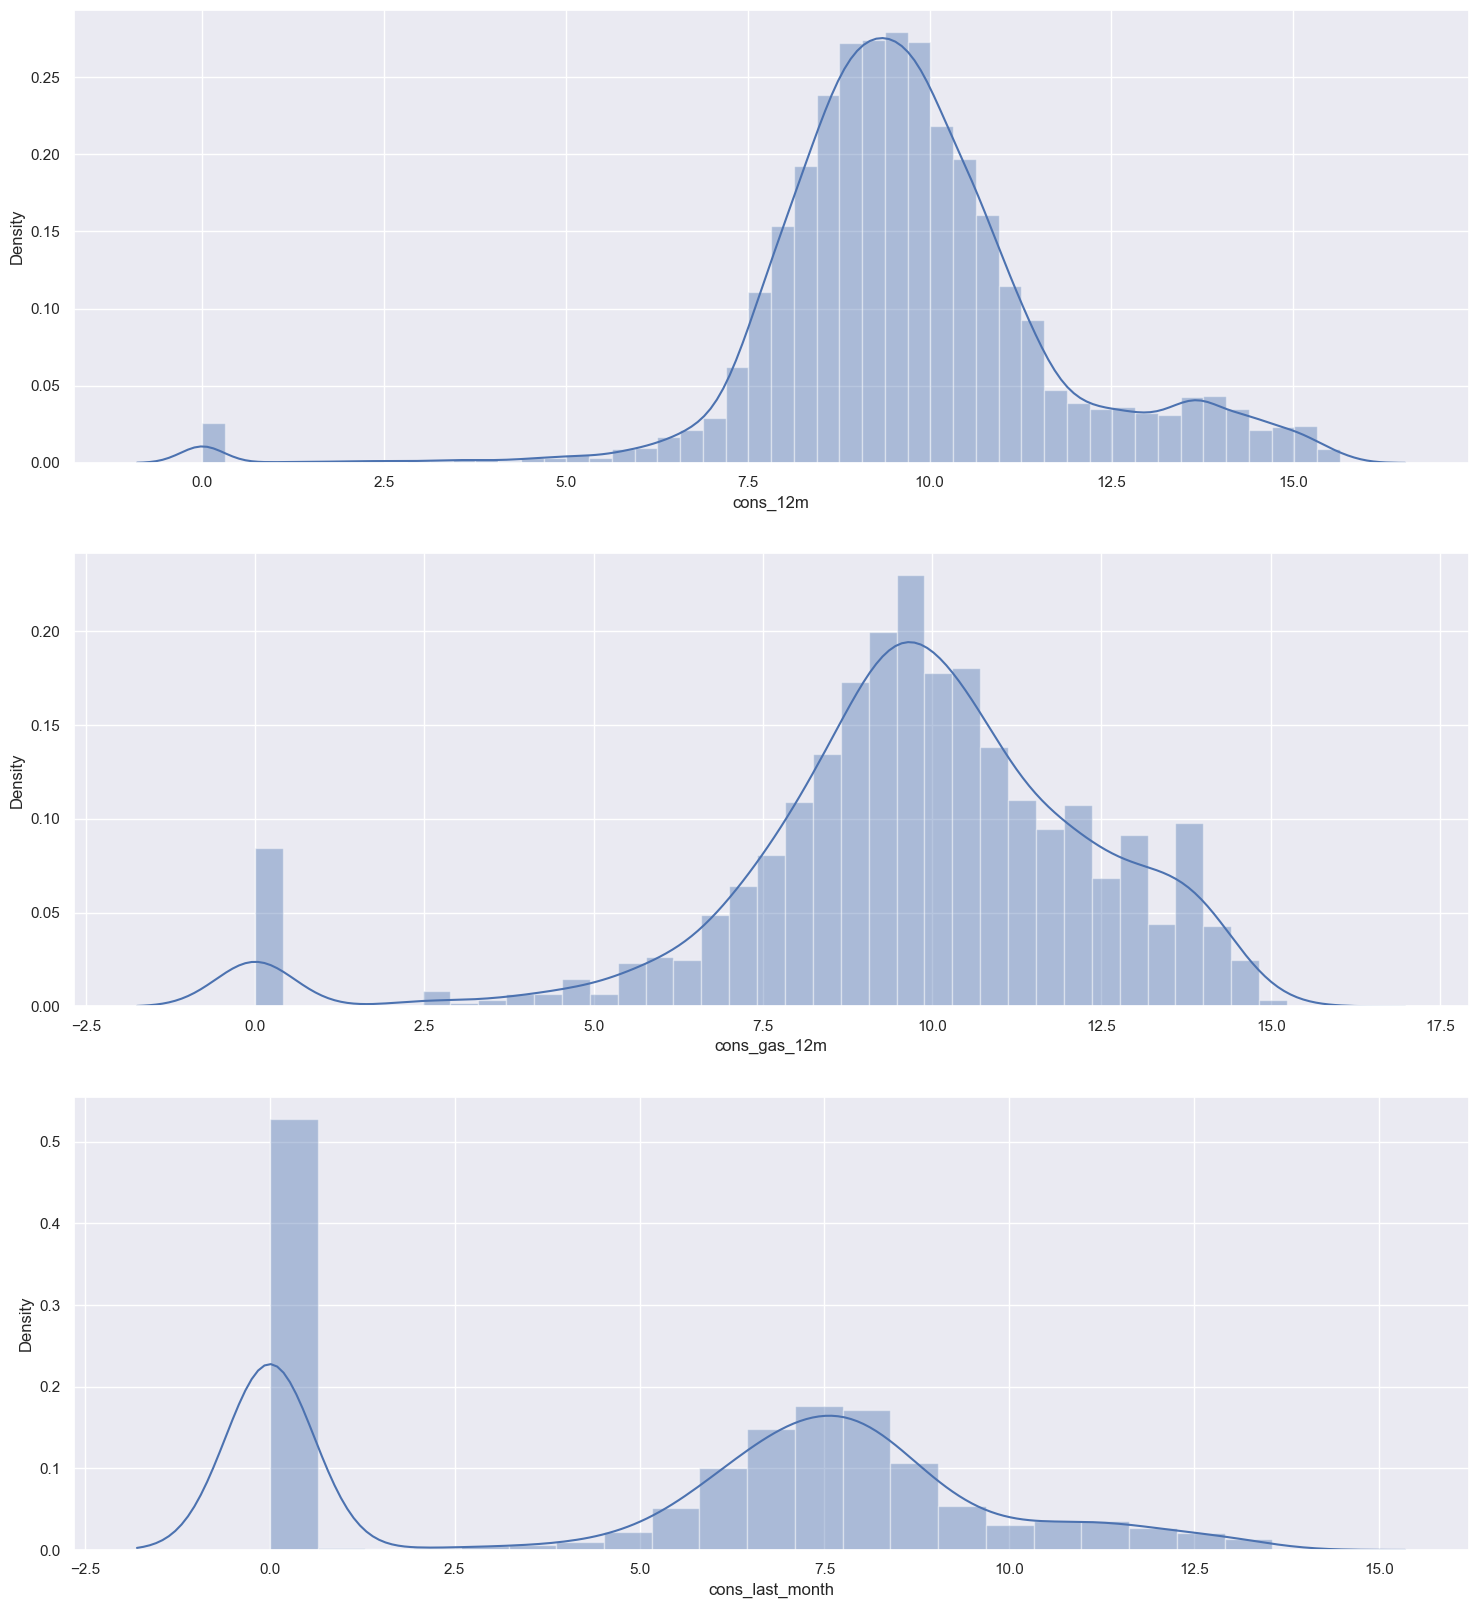

In [42]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlation

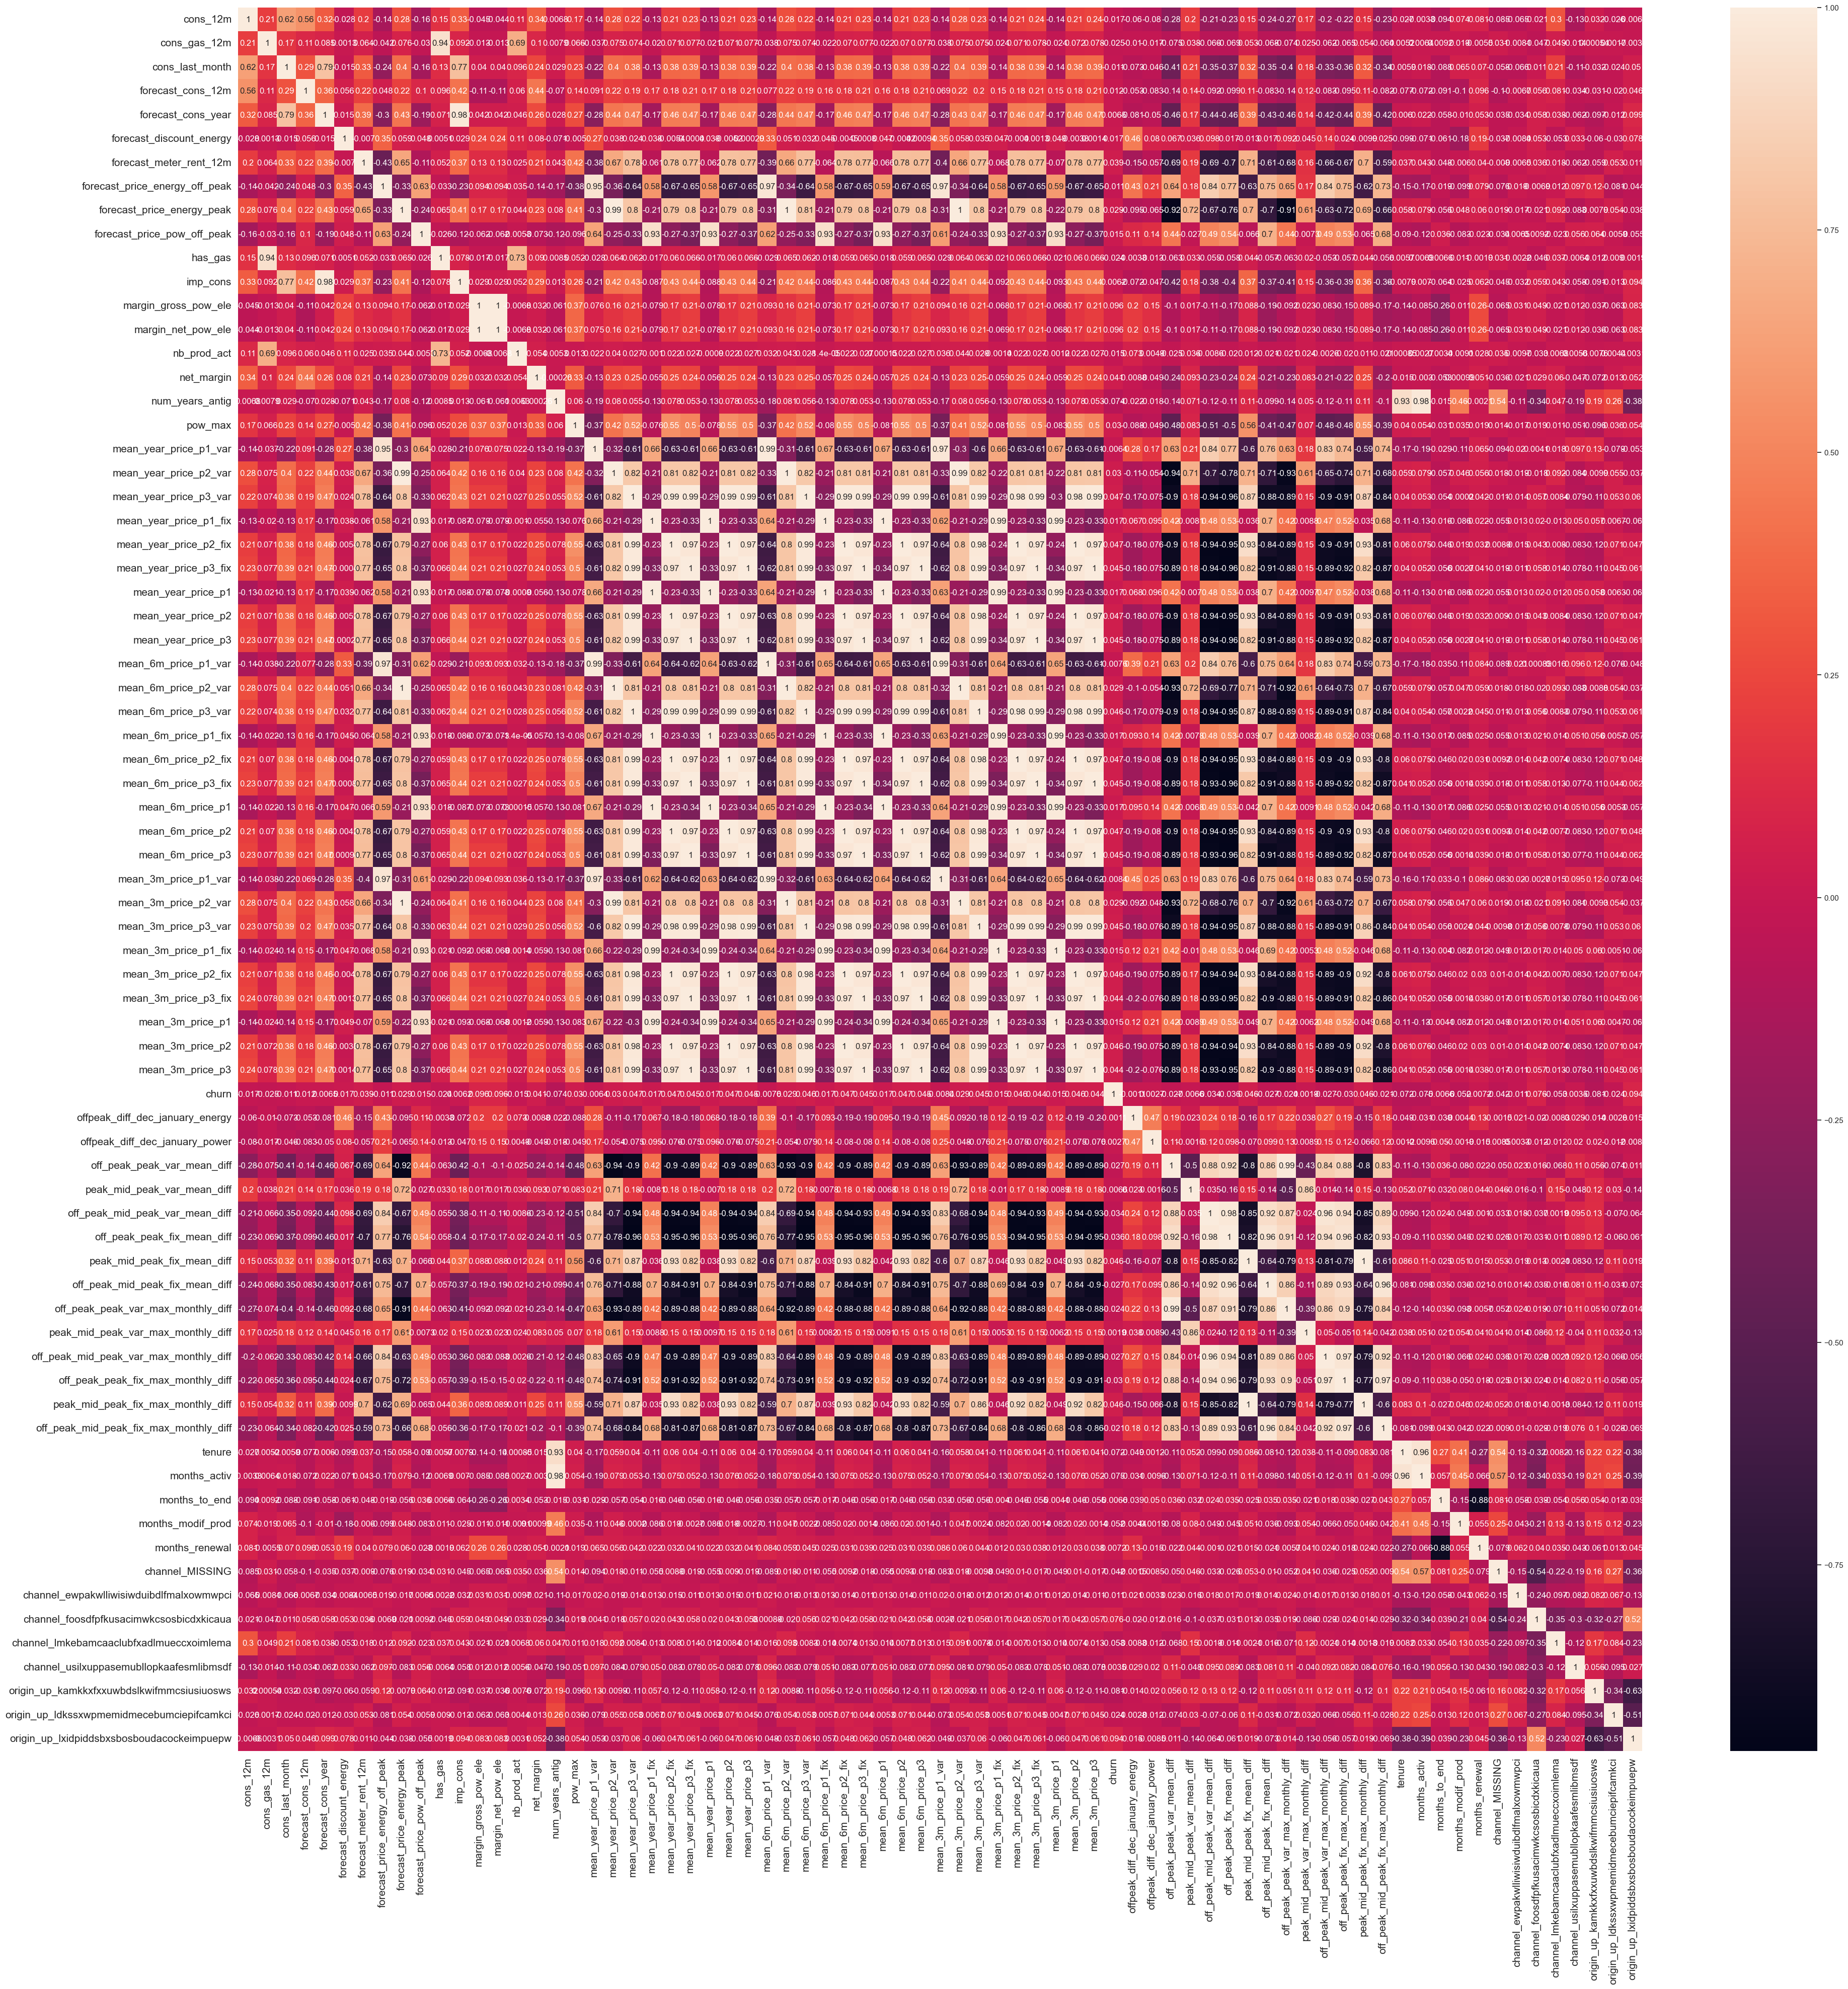

In [48]:
correlation = df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Removing features that are highly correlated with one another

In [49]:
no_churn = df.drop('churn', axis=1)

In [51]:
# This function selects highly correlated features
# Removes the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()          # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr        

In [83]:
corr_features = correlation(no_churn, 0.85)
print(len(corr_features))
corr_features

43


{'has_gas',
 'imp_cons',
 'margin_net_pow_ele',
 'mean_3m_price_p1',
 'mean_3m_price_p1_fix',
 'mean_3m_price_p1_var',
 'mean_3m_price_p2',
 'mean_3m_price_p2_fix',
 'mean_3m_price_p2_var',
 'mean_3m_price_p3',
 'mean_3m_price_p3_fix',
 'mean_3m_price_p3_var',
 'mean_6m_price_p1',
 'mean_6m_price_p1_fix',
 'mean_6m_price_p1_var',
 'mean_6m_price_p2',
 'mean_6m_price_p2_fix',
 'mean_6m_price_p2_var',
 'mean_6m_price_p3',
 'mean_6m_price_p3_fix',
 'mean_6m_price_p3_var',
 'mean_year_price_p1',
 'mean_year_price_p1_fix',
 'mean_year_price_p1_var',
 'mean_year_price_p2',
 'mean_year_price_p2_fix',
 'mean_year_price_p2_var',
 'mean_year_price_p3',
 'mean_year_price_p3_fix',
 'months_activ',
 'months_renewal',
 'off_peak_mid_peak_fix_max_monthly_diff',
 'off_peak_mid_peak_fix_mean_diff',
 'off_peak_mid_peak_var_max_monthly_diff',
 'off_peak_mid_peak_var_mean_diff',
 'off_peak_peak_fix_max_monthly_diff',
 'off_peak_peak_fix_mean_diff',
 'off_peak_peak_var_max_monthly_diff',
 'off_peak_peak_va

In [85]:
model_features = df.drop(columns=df[corr_features])
model_features.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000     10.914124         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  8.446985      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.300786      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  7.368340      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  8.395252      0.000000         6.267201   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           5.252012            0.000000                       0.0   
2           3.891004            0.000000                       0.0   
3           5.484963            0.000000                       0.0   
4           6.101999            6.267201                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.022451                        0.114481   
1                 2.848971                        0.145711   
2                 3.681855                        0.165794   
3                 3.036394                        0.146694   
4                 4.888317                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  \
0                    0.098142                    40.606701   
1                    0.000000                    44.311378   
2                    0.087899                    44.311378   
3                    0.000000                    44.311378   
4                    0.100015                    40.606701   

   margin_gross_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0                 25.44            2      678.99                3   43.648   
1                 16.38            1       18.89                6   13.800   
2                 28.60            1        6.60                6   13.856   
3                 30.22            1       25.46                6   13.200   
4                 44.91            1       47.98                6   19.800   

   mean_year_price_p3_var  churn  offpeak_diff_dec_january_energy  \
0                0.066530      1                         0.020057   
1                0.000000      0                        -0.003767   
2                0.000000      0                        -0.004670   
3                0.000000      0                        -0.004547   
4                0.072865      0                        -0.006192   

   offpeak_diff_dec_january_power  peak_mid_peak_var_mean_diff  months_to_end  \
0                        3.700961                     0.034219              5   
1                        0.177779                     0.007124              7   
2                        0.177779                     0.088421              3   
3                        0.177779                     0.000000              2   
4                        0.162916                     0.030773              2   

   months_modif_prod  channel_MISSING  \
0                  2                0   
1                 76                1   
2                 68                0   
3                 69                0   
4                 71                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3            

## Modelling

In [86]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [100]:
x = df.drop(columns=['id', 'churn'])
y = df['churn']

In [101]:
print(x.shape)
print(y.shape)

(14605, 72)
(14605,)


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10953, 72)
(10953,)
(3652, 72)
(3652,)


In [103]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=1000)

In [104]:
predictions = model.predict(x_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [105]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [106]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 20
False positives: 1
True negatives: 3278
False negatives: 353

Accuracy: 0.9030668127053669
Precision: 0.9523809523809523
Recall: 0.05361930294906166


Looking at these results there are a few things to point out:


- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 3278 out of 3279. This means that out of all the negative cases (churn = 0), we predicted 3278 as negative (hence the name True negative). This is great!
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 353, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there is 1 case, which is great!
- With the true positives, we can see that in total we have 373 clients that churned in the test dataset. However, we are only able to correctly identify 20 of those 373, which is very poor.
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
- Looking at the precision score, this shows us a score of 0.95 which is not bad.
- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 


### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [107]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


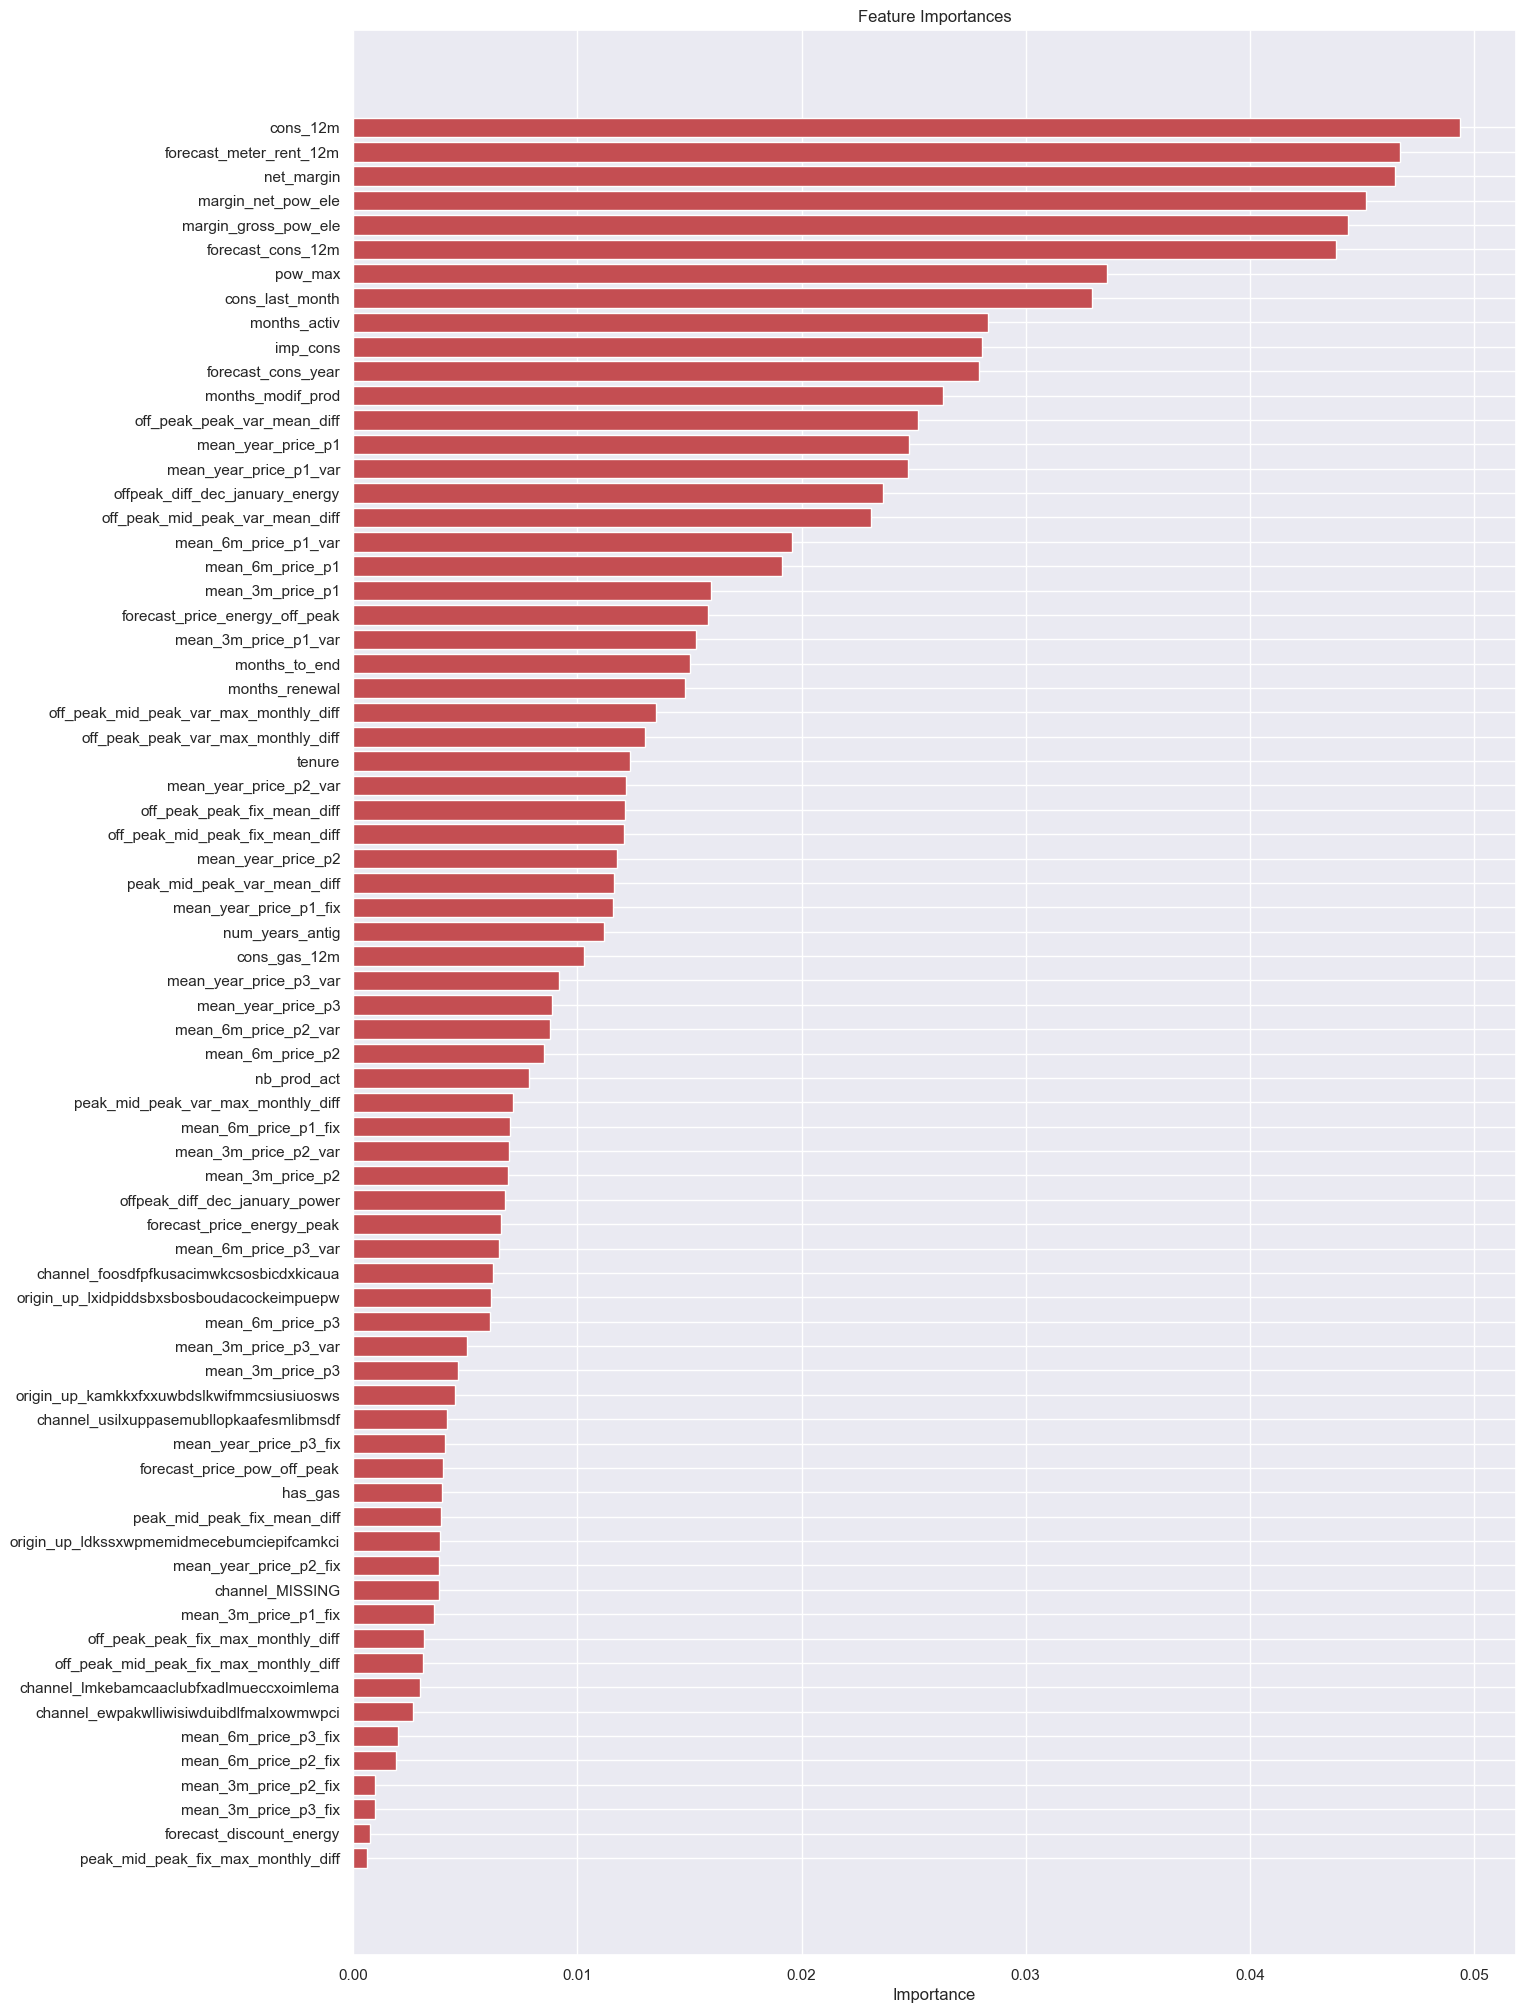

In [108]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='r', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    'Is churn driven by the customer sensitivity to price?'

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [111]:
proba_predictions = model.predict_proba(x_test)
probabilities = proba_predictions[:, 1]


In [115]:
x_test = x_test.reset_index()
x_test.drop(columns='level_0', inplace=True) 

In [117]:
x_test.drop(columns='index', inplace=True) 

In [120]:
x_test['churn'] = predictions.tolist()
x_test['churn_probability'] = probabilities.tolist() 

In [121]:
x_test.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  13.137678      0.000000        10.857093           0.000000   
1  13.817002     11.981785        11.629801           6.490830   
2   0.000000      0.000000         0.000000           0.000000   
3  10.005728      0.000000         0.000000           8.097478   
4   7.372746      0.000000         5.720312           5.809673   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 4.988185   
1            7.057898                       0.0                 3.021400   
2            0.000000                       0.0                 4.894775   
3            0.000000                       0.0                 3.004692   
4            5.720312                       0.0                 2.851862   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        0  0.000000                 99.96   
1                    44.311378        1  5.144117                 19.20   
2                    59.173468        0  0.000000                  0.00   
3                    44.311378        0  0.000000                 29.76   
4                    44.311378        0  3.795264                 10.08   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               99.96            1        0.00                3   40.000   
1               19.20            2       55.09                6   10.392   
2                0.00            1        0.00                8    9.900   
3               29.76            1      317.74                6   13.200   
4               10.08            1       18.25                3   10.392   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.127558                0.107086                0.076709   
1                0.148958                0.000000                0.000000   
2                0.104044                0.092514                0.065678   
3                0.147965                0.000000                0.000000   
4                0.221441                0.000000                0.000000   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.565972               24.339579               16.226385   
1               44.370635                0.000000                0.000000   
2               59.173468               36.490689                8.367731   
3               44.266930                0.000000                0.000000   
4               44.370636                0.000000                0.000000   

   mean_year_price_p1  mean_year_price_p2  mean_year_price_p3  \
0           40.693529           24.446665           16.303095   
1           44.519593            0.000000            0.000000   
2           59.277512           36.583203            8.433409   
3           44.414895            0.000000            0.000000   
4           44.592077            0.000000            0.000000   

   mean_6m_price_p1_var  mean_6m_price_p2_var  mean_6m_price_p3_var  \
0              0.124231              0.105422              0.076910   
1              0.147532              0.000000              0.000000   
2              0.101630              0.091216              0.065678   
3              0.146184              0.000000              0.000000   
4              0.165348              0.000000              0.000000   

   mean_6m_price_p1_fix  mean_6m_price_p2_fix  mean_6m_price_p3_fix  \
0             40.565973             

In [123]:
x_test.to_csv('out_of_sample_data_with_predictions.csv')